In [3]:
!pip install finance-datareader

  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/48.2 kB ? eta -:--:--
   ---------------------------------------- 48.2/48.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
   ---------------------------------------- 105.1/105.1 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.7/4.0 MB 15.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.0 MB 19.1 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.0 MB 24.2 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 50.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 67.1 MB/s eta 0:00:01
   ---------------------------- -----


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import FinanceDataReader as fdr  # 금융 데이터를 쉽게 불러오는 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
plt.rcParams["font.family"] = "Malgun Gothic"

In [5]:
df = fdr.DataReader('USD/KRW', '2023-07-10', '2025-07-10') # 3년치 데이터 가져오기
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,520.000000,520.000000,520.000000,520.000000,520.0,520.000000
mean,1365.920291,1372.697191,1359.868405,1365.921233,0.0,1365.921233
std,49.920062,50.385678,50.178150,49.917806,0.0,49.917806
min,1264.939941,1266.030029,1216.959961,1264.939941,0.0,1264.939941
25%,1330.687500,1335.934967,1325.352509,1330.687500,0.0,1330.687500
50%,1359.690002,1366.905029,1353.460022,1359.690002,0.0,1359.690002
75%,1392.872498,1399.239990,1386.040009,1392.872498,0.0,1392.872498
max,1486.130005,1487.040039,1470.390015,1486.130005,0.0,1486.130005


C:\Users\timeo\AppData\Local\Temp\ipykernel_21400\1500000635.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['환율 수익률'] = df['환율'].pct_change() * 100 # 퍼센트(%) 변동률로 변환
c:\Users\timeo\.virtualenvs\lecture_code-OR4jHJxs\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


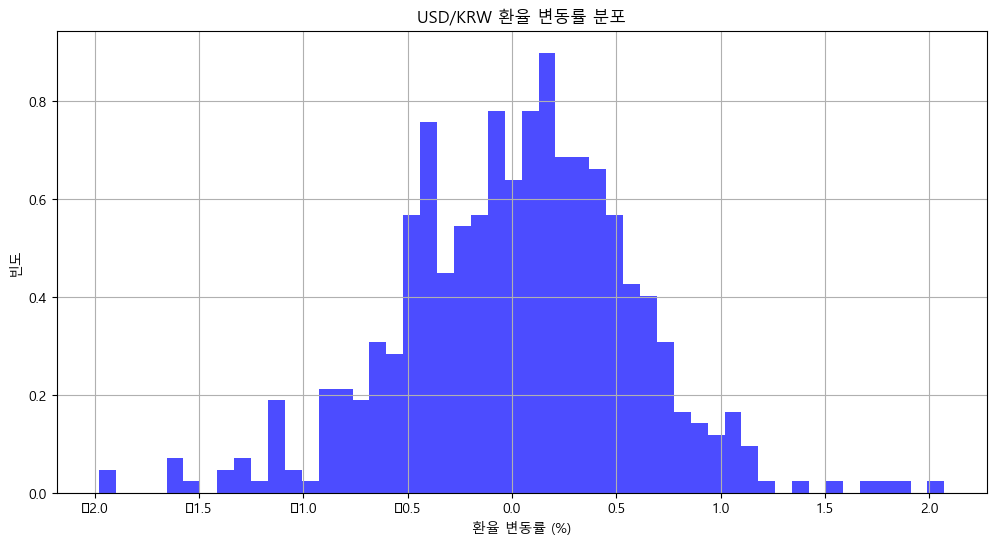

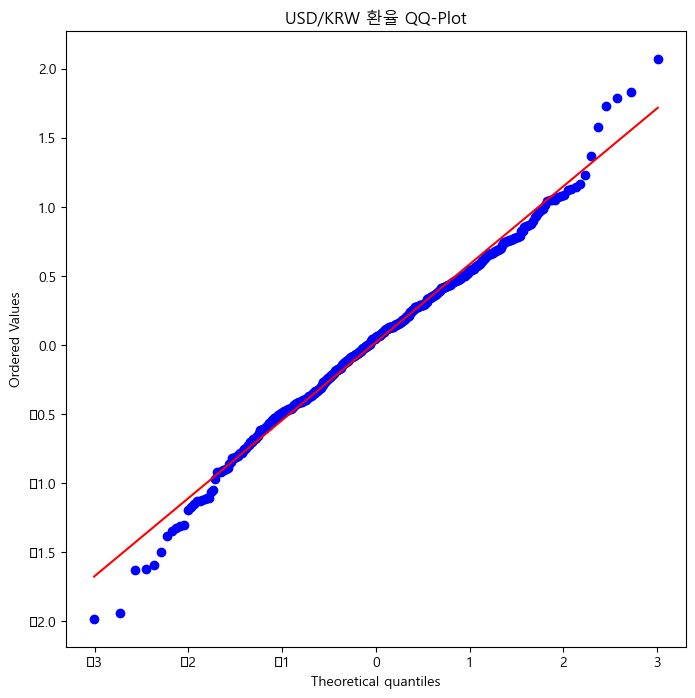

In [ ]:
# 1. USD/KRW 환율 데이터 불러오기
df = fdr.DataReader('USD/KRW', '2023-07-10', '2025-07-10') # 3년치 데이터 가져오기
#df.describe()
df = df[['Close']] # 종가 (Close) 데이터만 사용
df = df.rename(columns={'Close' : '환율'}) # 컬럼명 변경

# 2. 환율 변동률(수익률) 계산
df['환율 수익률'] = df['환율'].pct_change() * 100 # 퍼센트(%) 변동률로 변환
df = df.dropna() # 첫 번째 NaN 값 제거

# 3. 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(df['환율 수익률'], bins=50, density=True, alpha=0.7, color='blue')
plt.title('USD/KRW 환율 변동률 분포')
plt.xlabel('환율 변동률 (%)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

# 4. QQ-Plot 그리기 (정규성 확인)
plt.figure(figsize=(8, 8))
stats.probplot(df['환율 수익률'], dist='norm', plot=plt)
plt.title("USD/KRW 환율 QQ-Plot")
plt.show()